In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("./bike_weather_joined.csv")

df.head()

,Unnamed: 0,TIME,STATION ID,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,rain,temp
0,0,2022-12-01 00:00:03,1,22,9,0.0,7.4
1,1,2022-12-01 00:00:03,2,10,10,0.0,7.4
2,2,2022-12-01 00:00:03,3,7,13,0.0,7.4
3,3,2022-12-01 00:00:03,4,15,5,0.0,7.4
4,4,2022-12-01 00:00:03,5,1,39,0.0,7.4


In [4]:
df['TIME'] = pd.to_datetime(df['TIME'])

In [5]:
df.dtypes

Unnamed: 0                        int64
TIME                     datetime64[ns]
STATION ID                        int64
AVAILABLE_BIKE_STANDS             int64
AVAILABLE_BIKES                   int64
rain                            float64
temp                            float64
dtype: object

In [6]:
# Get day of the week
df['weekday'] = df['TIME'].dt.day_name()
df['hour'] = df['TIME'].dt.hour
df.head()

,Unnamed: 0,TIME,STATION ID,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,rain,temp,weekday,hour
0,0,2022-12-01 00:00:03,1,22,9,0.0,7.4,Thursday,0
1,1,2022-12-01 00:00:03,2,10,10,0.0,7.4,Thursday,0
2,2,2022-12-01 00:00:03,3,7,13,0.0,7.4,Thursday,0
3,3,2022-12-01 00:00:03,4,15,5,0.0,7.4,Thursday,0
4,4,2022-12-01 00:00:03,5,1,39,0.0,7.4,Thursday,0


In [8]:
weekdays = df.groupby(['weekday', 'STATION ID'])['AVAILABLE_BIKES'].mean()

In [9]:
weekdays.head(30)

weekday  STATION ID
Friday   1             12.509254
         2              7.042985
         3              7.848358
         4              8.783881
         5             21.031045
         6              4.517015
         7              7.496119
         8              9.976716
         9             12.013134
         10            10.641194
         11             6.000597
         12             6.189851
         13             3.972537
         14            17.823284
         15             3.954030
         16             9.749851
         17             3.792239
         18             9.215522
         19            12.371940
         20             8.006567
         21            14.013134
         22            11.007761
         23            18.577313
         24            11.473433
         25             8.420299
         26             8.877015
         27             8.585672
         28            12.294925
         29            15.685970
         30            

In [40]:
# # weekdays.plot(kind='bar')
# plt.figure()
# for name, groupedData in weekdays.groupby(['NAME']):
#     print(name)
#     groupedData.plot(kind = 'bar', label=name)
#     plt.show()



In [12]:
from sklearn.model_selection import train_test_split
monday = df[(df['weekday']=='Monday') & ( df['STATION ID'] == 1)]

x_train, x_test, y_train, y_test = train_test_split(monday['hour'], monday['AVAILABLE_BIKES'], test_size = 0.4, random_state=23)

In [13]:
monday.head()

,Unnamed: 0,TIME,STATION ID,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,rain,temp,weekday,hour
21696,21696,2022-12-05 00:00:03,1,15,16,0.0,7.4,Monday,0
21809,21809,2022-12-05 00:30:02,1,15,16,0.1,6.9,Monday,0
21922,21922,2022-12-05 01:00:03,1,15,16,0.1,6.9,Monday,1
22035,22035,2022-12-05 01:30:02,1,15,16,0.1,6.8,Monday,1
22148,22148,2022-12-05 02:00:02,1,15,16,0.1,6.8,Monday,2


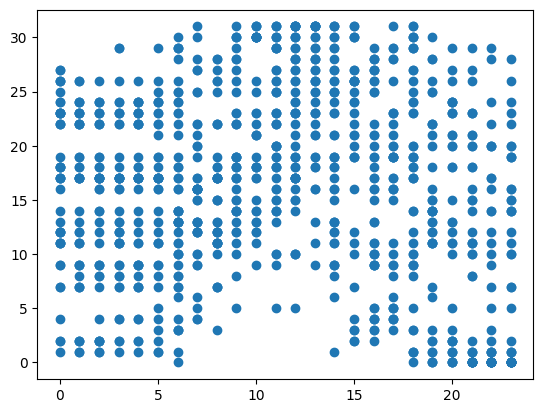

In [14]:
plt.scatter(x_train, y_train)  

In [15]:
x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
print(x_train)

[[ 6]
 [14]
 [ 6]
 [18]
 [14]
 [23]
 [19]
 [17]
 [ 7]
 [16]
 [ 9]
 [17]
 [13]
 [18]
 [17]
 [18]
 [23]
 [18]
 [18]
 [ 6]
 [17]
 [ 7]
 [ 1]
 [18]
 [17]
 [19]
 [18]
 [ 5]
 [12]
 [ 7]
 [ 8]
 [21]
 [ 3]
 [15]
 [16]
 [19]
 [ 3]
 [ 6]
 [ 5]
 [14]
 [ 8]
 [ 9]
 [21]
 [ 3]
 [14]
 [ 7]
 [ 3]
 [ 2]
 [23]
 [14]
 [ 4]
 [19]
 [15]
 [18]
 [ 4]
 [19]
 [20]
 [12]
 [22]
 [15]
 [ 1]
 [ 7]
 [23]
 [20]
 [18]
 [12]
 [21]
 [ 3]
 [13]
 [10]
 [12]
 [15]
 [16]
 [ 5]
 [ 8]
 [ 4]
 [16]
 [ 9]
 [21]
 [ 9]
 [22]
 [22]
 [21]
 [15]
 [ 2]
 [21]
 [ 4]
 [17]
 [ 9]
 [18]
 [10]
 [22]
 [23]
 [11]
 [16]
 [13]
 [ 8]
 [ 8]
 [18]
 [16]
 [ 3]
 [ 1]
 [ 1]
 [19]
 [10]
 [16]
 [22]
 [13]
 [19]
 [ 0]
 [ 3]
 [ 8]
 [ 2]
 [10]
 [ 5]
 [13]
 [ 3]
 [ 6]
 [10]
 [11]
 [ 8]
 [ 8]
 [14]
 [18]
 [20]
 [ 3]
 [ 6]
 [17]
 [10]
 [23]
 [12]
 [ 9]
 [ 7]
 [ 3]
 [ 9]
 [ 8]
 [ 8]
 [13]
 [ 6]
 [ 5]
 [ 1]
 [20]
 [ 9]
 [ 1]
 [ 1]
 [ 7]
 [ 3]
 [ 1]
 [20]
 [12]
 [ 9]
 [ 7]
 [11]
 [13]
 [14]
 [13]
 [ 1]
 [23]
 [20]
 [ 7]
 [14]
 [ 2]
 [10]
 [ 1]
 [ 9]
 [12]
 [ 1

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
c = lr.intercept_
m = lr.coef_
m

array([[-0.10762867]])

In [20]:
y_pred_train = lr.predict(x_train)

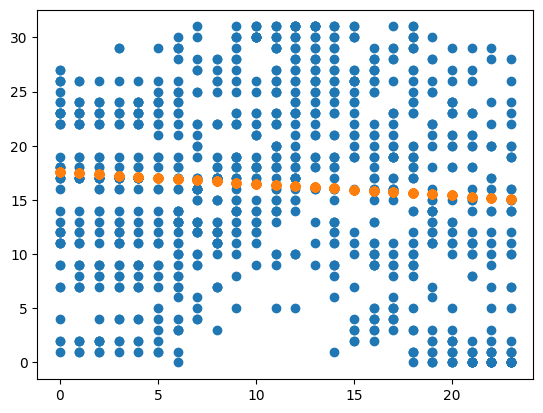

In [21]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_pred_train)
plt.show()

In [22]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(x_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)

print(poly_reg_model.intercept_, poly_reg_model.coef_)



[14.46694728] [[ 0.06543331  0.08054209 -0.00423384]]


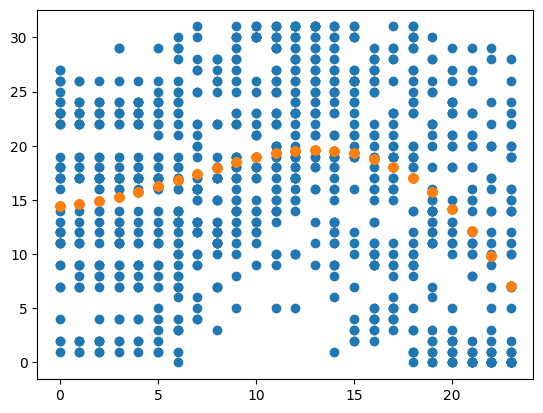

In [23]:
y_pred_train = poly_reg_model.predict(poly_features)
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_pred_train)
plt.show()

In [39]:
df = df.drop(columns='TIME')
x = df.drop(columns=['AVAILABLE_BIKES', 'AVAILABLE_BIKE_STANDS'])
# stands = df.drop(columns=) /
y = df['AVAILABLE_BIKES']

In [41]:
y

0           9
1          10
2          13
3           5
4          39
           ..
1316034     6
1316035     1
1316036    30
1316037     5
1316038     1
Name: AVAILABLE_BIKES, Length: 1316039, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(x_train, y_train)

ValueError: could not convert string to float: 'Thursday'